In [101]:
import os
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt

In [89]:
def read_heart_rate(filepath):
    data = loadmat(filepath)
    result = []
    for segment in data['BeatToBeat']['HR'][0, 0][:, 0]:
        result += segment.flatten().tolist()
    return np.array(result[500:-50])

In [94]:
def read_folder(folder):
    return [read_heart_rate(os.path.join(folder, filename)) for filename in os.listdir(folder)]

In [96]:
healthy = read_folder('original/No finding')
synkopes = read_folder('original/Synkope')

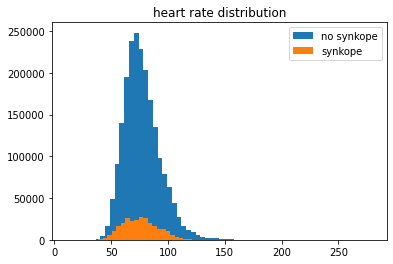

In [117]:
plt.title('heart rate distribution')
plt.hist(np.concatenate(healthy), bins=64, label='no synkope')
plt.hist(np.concatenate(synkopes), bins=64, label='synkope')
plt.legend()
plt.show()

In [97]:
def nan_length(array):
    '''Length of longest NaN sequence in array'''
    mask = np.concatenate(([False], np.isnan(array), [False]))
    if ~mask.any():
        return 0
    else:
        idx = np.nonzero(mask[1:] != mask[:-1])[0]
        return (idx[1::2] - idx[::2]).max()

In [110]:
def plot_nan_lengths(data, name):
    plt.title(f'{name}: NaN infestation analysis')
    plt.xlabel('longest sequence of NaNs')
    plt.ylabel('cumulative amount of cases')
    nan_lengths = np.array([nan_length(d) for d in data])
    xs = np.arange(0, nan_lengths.max() + 1)
    ys = [np.count_nonzero(nan_lengths <= x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

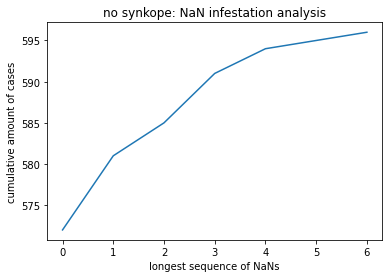

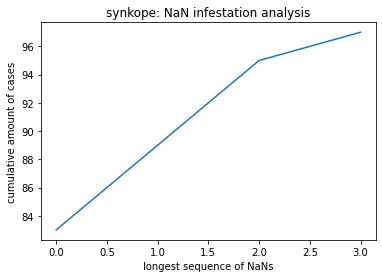

In [111]:
plot_nan_lengths(healthy, 'no synkope')
plot_nan_lengths(synkopes, 'synkope')